In [1]:
#Préparer les données à utiliser dans cet exercice

import nltk
import os
#Télécharger le package punkt, utilisé une partie des autres commandes
nltk.download('punkt')

#Lire le fichier de base dans une liste de jetons
base_file = open(os.getcwd()+ "/Essentiel-Apache-Spark.txt", 'rt')
raw_text = base_file.read()
base_file.close()

#Exécutez le même prétraitement effectué dans le module 3
token_list = nltk.word_tokenize(raw_text)

token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))

token_list3=[word.lower() for word in token_list2 ]

nltk.download('stopwords')
from nltk.corpus import stopwords
token_list4 = list(filter(lambda token: token not in stopwords.words('french'), token_list3))


import spacy
from spacy.language import Language

nlp = spacy.load('fr_core_news_sm')
doc = nlp(" ".join(token_list4))
token_list5 = [d.lemma_ for d in doc]


print("\n Tokens totaux : ",len(token_list5))

[nltk_data] Downloading package punkt to /home/yannick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yannick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/yannick/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0



 Tokens totaux :  58


## 04_01 Construire des ngrammes

In [2]:

from nltk.util import ngrams
from collections import Counter

#Trouvez des bigrammes et imprimez les 5 les plus courants
bigrams = ngrams(token_list5,2)
print("Bigrammes les plus courants : ")
print(Counter(bigrams).most_common(5))

#Trouvez des trigrammes et imprimez les 5 les plus courants
trigrams = ngrams(token_list5,3)
print(" \n Trigrammes les plus courants : " )
print(Counter(trigrams).most_common(5))

Bigrammes les plus courants : 
[(('apache', 'spark'), 2), (('si', 'intéresser'), 1), (('intéresser', 'big'), 1), (('big', 'data'), 1), (('data', 'connaître'), 1)]
 
 Trigrammes les plus courants : 
[(('si', 'intéresser', 'big'), 1), (('intéresser', 'big', 'data'), 1), (('big', 'data', 'connaître'), 1), (('data', 'connaître', 'certainement'), 1), (('connaître', 'certainement', 'apache'), 1)]


## 04_02 Parts-of-Speech Tagging

Some examples of Parts-of-Speech abbreviations:
NN : noun
NNS : noun plural
VBP : Verb singular present.

In [3]:
#télécharger le package tagger
nltk.download('averaged_perceptron_tagger')

#Taguez et imprimez les 10 premiers tokens
nltk.pos_tag(token_list5)[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yannick/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('si', 'NN'),
 ('intéresser', 'NN'),
 ('big', 'JJ'),
 ('data', 'NNS'),
 ('connaître', 'NN'),
 ('certainement', 'NN'),
 ('apache', 'NN'),
 ('spark', 'NN'),
 ('savez', 'VBP'),
 ('vous', 'JJ')]

In [4]:
# Tager le texte en utilisant spacy
doc = nlp(" ".join(token_list5))
pos_tags = [(d.text, d.pos_) for d in doc]
# Afficher les premièrs mots 
print(pos_tags[:10])

[('si', 'SCONJ'), ('intéresser', 'VERB'), ('big', 'DET'), ('data', 'ADV'), ('connaître', 'VERB'), ('certainement', 'ADV'), ('apache', 'NOUN'), ('spark', 'AUX'), ('savez', 'ADV'), ('vous', 'PRON')]


## 04_04 Building TF-IDF matrix

In [3]:
#Utiliser la bibliothèque scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#Utiliser un petit corpus pour chaque visualisation
vector_corpus = [
    'Fouille du texte en R et Python : 8 conseils pour démarrer',
    'Fouille du texte avec R : collecte et nettoyage de données',
    'L\'analyse des sentiments dans R simplifiée'
]

#Créer un vectoriseur pour la langue française
vectorizer = TfidfVectorizer(stop_words=stopwords.words('french'))

#Créer le vecteur
tfidf=vectorizer.fit_transform(vector_corpus)

print("Les tokens utilisés comme fonctionnalités sont : : ")
print(vectorizer.get_feature_names())

print("\n Taille du tableau. Chaque ligne représente un document. Chaque colonne représente une fonctionnalité/jeton")
print(tfidf.shape)

print("\n Tableau TF-IDF réel")
tfidf.toarray()


Les tokens utilisés comme fonctionnalités sont : : 
['analyse', 'collecte', 'conseils', 'données', 'démarrer', 'fouille', 'nettoyage', 'python', 'sentiments', 'simplifiée', 'texte']

 Taille du tableau. Chaque ligne représente un document. Chaque colonne représente une fonctionnalité/jeton
(3, 11)

 Tableau TF-IDF réel


/home/yannick/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0.        , 0.        , 0.49047908, 0.        , 0.49047908,
        0.37302199, 0.        , 0.49047908, 0.        , 0.        ,
        0.37302199],
       [0.        , 0.49047908, 0.        , 0.49047908, 0.        ,
        0.37302199, 0.49047908, 0.        , 0.        , 0.        ,
        0.37302199],
       [0.57735027, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.57735027, 0.57735027,
        0.        ]])

# Word Clouds <a id="8"></a>
`word clouds` (également appelés nuages de texte ou nuages de balises) fonctionnent de manière simple : plus un mot spécifique apparaît dans une source de données textuelles (comme un discours, un article de blog ou une base de données), plus il apparaît en gros et en gras dans le nuage de mots.

In [10]:
# install wordcloud
!pip3 install wordcloud==1.8.1

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

print ('Wordcloud is installed and imported!')

/home/yannick/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/yannick/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Wordcloud is installed and imported!


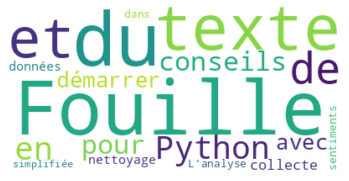

In [11]:
stopwords = set(STOPWORDS)
# instantiate a word cloud object
ex_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
corpus = ""
for doc in vector_corpus:
    corpus += " "+doc
ex_wc.generate(corpus)
# display the word cloud
plt.imshow(ex_wc, interpolation='bilinear')
plt.axis('off')
plt.show()